## IR3 

### Create an original graph

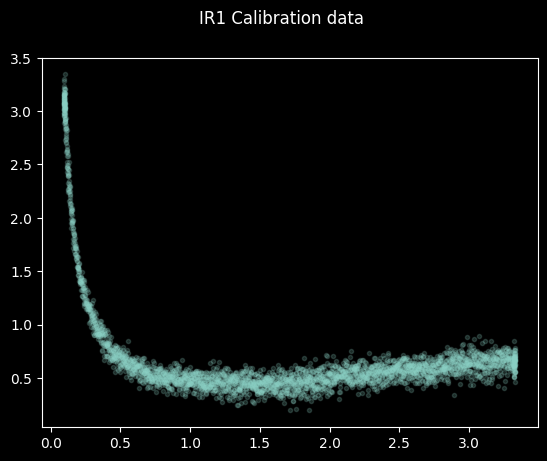

In [1]:
from numpy import loadtxt
from matplotlib.pyplot import subplots, show
# import matplotlib.pyplot as plt

# Load data
filename = 'partA/ir3-calibration.csv'
data = loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
distance, raw_ir3 = data.T

# create a graph object
fig, ax = subplots()

fig.suptitle("IR1 Calibration data")

ax.plot(distance,raw_ir3,'.',alpha=0.2)


### error function


In [2]:
def square_error(data_voltage, sim_voltage):
    total_error = 0
    for i in range(len(ir3_fit)):
        total_error = total_error + (data_voltage[i] - sim_voltage[i]) **2
    return total_error
        
# Tot = square_error(ir3_fit,raw_ir3)
# print(Tot)

## model

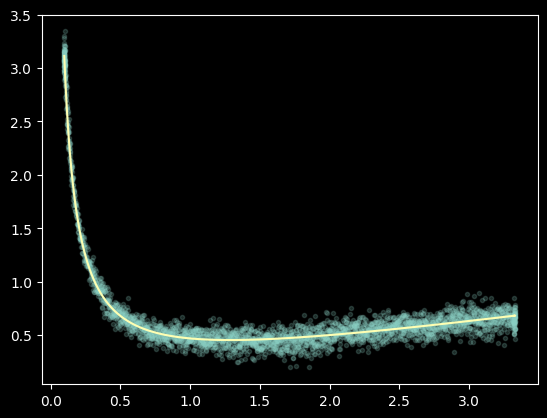

interactive(children=(FloatSlider(value=2.0, description='x0', max=3.0, step=0.01), Output()), _dom_classes=('…

<function __main__.linearise_demo1_plot(x0, params, distance)>

In [3]:
import scipy as sp
from ipywidgets import interact, interactive, fixed

def ir3_model(x,a,b,c):
    return a/ x + b * x  +c

ir3_params, cov = sp.optimize.curve_fit(ir3_model,distance,raw_ir3)
ir3_fit = ir3_model(distance, *ir3_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir3,'.',alpha=0.2)
ax.plot(distance,ir3_fit)

# the error: 
# error_ir3 = square_error(ir3_fit,raw_ir3)
# print(error_ir3)

# *************************************************************************
import numpy as np
# from ipywidgets import interact, interactive, fixed
from ipywidgets import interact
import ipywidgets as widgets


from lib.signal_plot import signal_plot
matplotlib.style.use('default')  # Graph white background 

params = 3
def linearise_demo1_plot(x0,params,distance):

    Nx = len(distance)
    # x = np.linspace(0, 10, Nx)
    x = distance 
    k1 = params[0]; k2 = params[1]; k3 = params[2]
    
    h = k1 / x  + k2 * x + k3

    # H 方程的倒数/斜率
    J = -k1 / ( x0**2 )  + k2

    h2 = J * (x - x0) + k1 / x0  + k2 * x0 + k3

    fig = signal_plot(x, h)
    ax = fig.axes[0]
    ax.set_xlabel('$x$')    
    ax.plot(x, h2)
    ax.set_ylim(0, 3.5)
    
# linearise_demo1_plot(0.1,ir3_params,distance)
interact(linearise_demo1_plot, x0=widgets.FloatSlider(min=0, max=3, step=0.01, value=2.0), params=fixed(ir3_params), distance=fixed(distance))



In [4]:
params = [3]

def linearise_demo1_plot(x0, params):
    Nx = 201
    x = np.linspace(0, 10, Nx)
    params[0] = 3
    k1 = 10
    k2 = 1
    
    h = k1 / (k2 + x)

    # H 方程的倒数/斜率
    J = -k1 / (k2 + x0)**2 

    h2 = J * (x - x0) + k1 / (k2 + x0)

    fig = signal_plot(x, h)
    ax = fig.axes[0]
    ax.set_xlabel('$x$')    
    ax.plot(x, h2)


### Polynomial

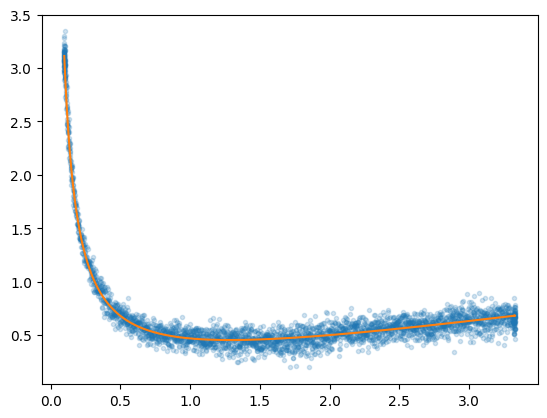

In [5]:
import scipy as sp

def ir3_polynomial_model(x,a,b,c):
    return a/x*2 + b*x +c

ir3_polynomial_params, cov = sp.optimize.curve_fit(ir3_polynomial_model,distance,raw_ir3)
ir3_polynomial_fit = ir3_polynomial_model(distance, *ir3_polynomial_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir3,'.',alpha=0.2)
ax.plot(distance,ir3_polynomial_fit)



# ax.plot(distance,ir1_fit )

# the ERROR for Polynomial
# error_ir3_polynomial = square_error(raw_ir3,ir3_polynomial_fit)
# print(error_ir3_polynomial)
# print(ir3_polynomial_params)

Text(0, 0.5, 'Measurement $z$')

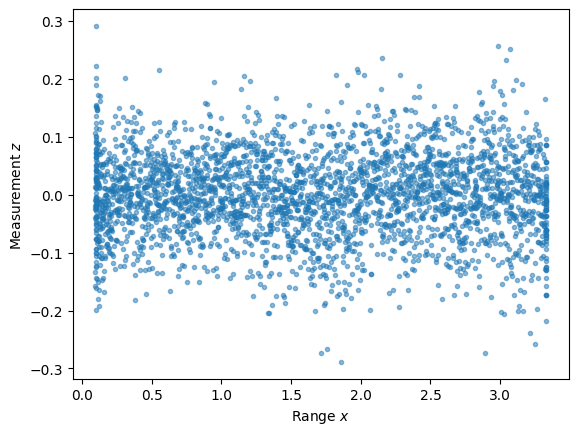

In [6]:
residual_ir3_polynomial = raw_ir3 - ir3_polynomial_fit
fig,ax = subplots(1)
ax.plot(distance,residual_ir3_polynomial,'.',alpha=0.5)
# Add labels with LaTeX-style notation
ax.set_xlabel(r"Range $x$")
ax.set_ylabel(r"Measurement $z$")

## Piecewise Function

20.408597007477358


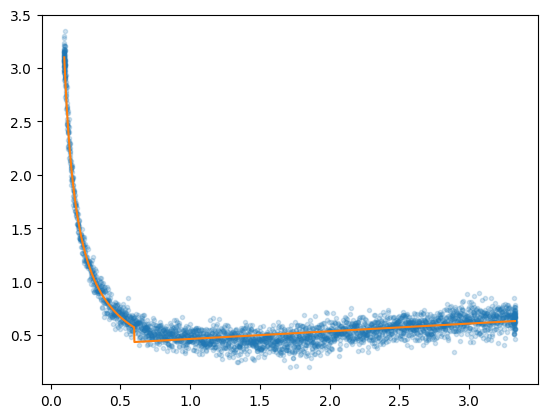

In [7]:
import scipy as sp
import numpy as np
def ir3_piecewise_model(x,a1,b1,a2,b2):
    res = np.zeros_like(x)
    res[x < 0.6] = a1 / x[x<0.6] + b1
    res[x >= 0.6] = a2 * x[x>=0.6] + b2
    return res

ir3_params, cov = sp.optimize.curve_fit(ir3_piecewise_model,distance,raw_ir3)
ir3_fit_pw = ir3_piecewise_model(distance, *ir3_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir3,'.',alpha=0.2)
ax.plot(distance,ir3_fit_pw)

# the ERROR for Piecewise
error_ir3_pw = square_error(raw_ir3,ir3_fit_pw)
print(error_ir3_pw)


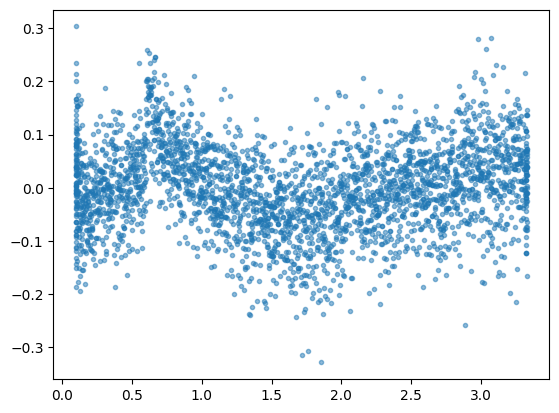

In [8]:
residual_pw = raw_ir3 - ir3_fit_pw
fig,ax = subplots(1)
ax.plot(distance,residual_pw,'.',alpha=0.5)


15.995487203907203
[ 0.30191011  0.18236905 -0.01632742]


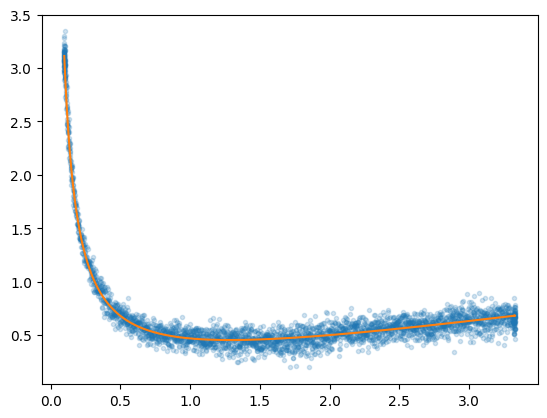

In [9]:
import scipy as sp

def ir3_polynomial_model(x,a,b,c):
    return a/x + b*x +c

ir3_polynomial_params, cov = sp.optimize.curve_fit(ir3_polynomial_model,distance,raw_ir3)
ir3_polynomial_fit = ir3_polynomial_model(distance, *ir3_polynomial_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir3,'.',alpha=0.2)
ax.plot(distance,ir3_polynomial_fit)
# ax.plot(distance,ir1_fit )

# the ERROR for Polynomial
error_ir3_polynomial = square_error(raw_ir3,ir3_polynomial_fit)
print(error_ir3_polynomial)
print(ir3_polynomial_params)
